/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
<br>
<br>
/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
<br>
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
<br>
<br>
Для этих двух наборов данных нужно:
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

## Импорт библиотек

In [1]:
#импортим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup as bs

## Табличная информация

In [2]:
#записи таблиц в переменные
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


model — модели самолета<br>
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [4]:
df2.sample(10)

,city,average_flights
71,Саранск,2.000000
44,Мурманск,2.000000
49,Нефтеюганск,1.000000
68,Салехард,2.000000
13,Владикавказ,2.000000
56,Норильск,2.290323
16,Воронеж,2.000000
19,Грозный,1.129032
80,Томск,4.193548
48,Нерюнгри,2.580645


city — города<br>
average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


## Визуализация данных

In [8]:
#функция для улучшения визуализации
def plot(graf , xlabel='', ylabel=''):
    for i in graf.patches:
        graf.annotate(
            format(i.get_height(),'.0f'),
            (i.get_x() + i.get_width()/2., i.get_height()),
            ha='center',va='center',
            size =13 , xytext=(1,10), textcoords = 'offset points'
        )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

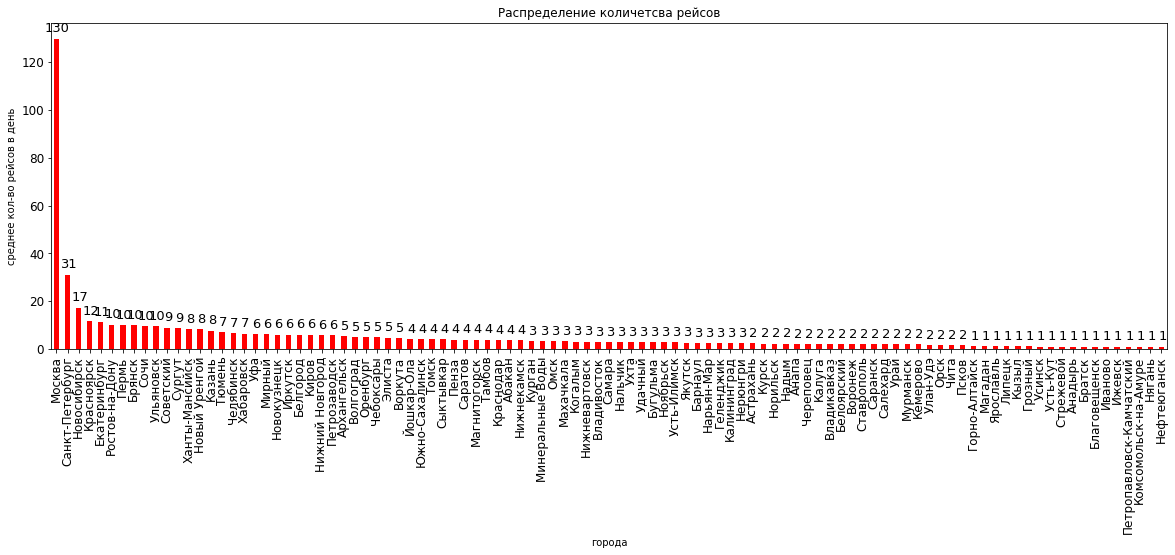

In [9]:
#график распределения среднего количества перелетов в день
ax = (df2.pivot_table(index='city', values= 'average_flights', aggfunc ='max')
        .sort_values(['average_flights'],ascending = False)
     .plot(kind='bar' , figsize = (20,6) , title = 'Распределение количетсва рейсов', fontsize = 12 , color = 'red' , legend= False))
plot(ax,xlabel='города',ylabel='среднее кол-во рейсов в день')

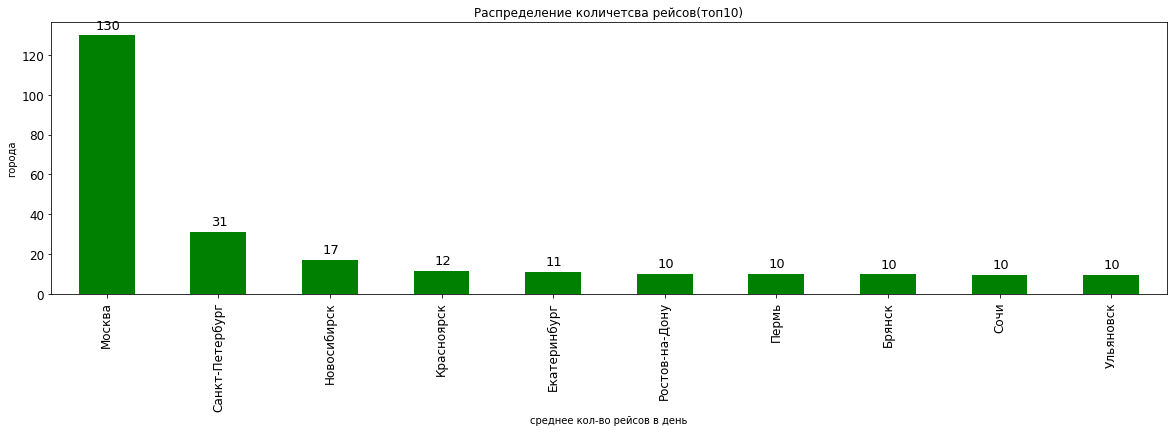

In [10]:
#график распределения среднего количества перелетов в день топ 10
ax_top10 = (df2.pivot_table(index='city', values= 'average_flights', aggfunc ='max')
        .sort_values(['average_flights'],ascending = False).head(10)
     .plot(kind='bar' , figsize = (20,5) , title = 'Распределение количетсва рейсов(топ10)'
           , fontsize = 12 , color = 'green' , legend= False))
plot(ax_top10,xlabel='среднее кол-во рейсов в день' , ylabel ='города')

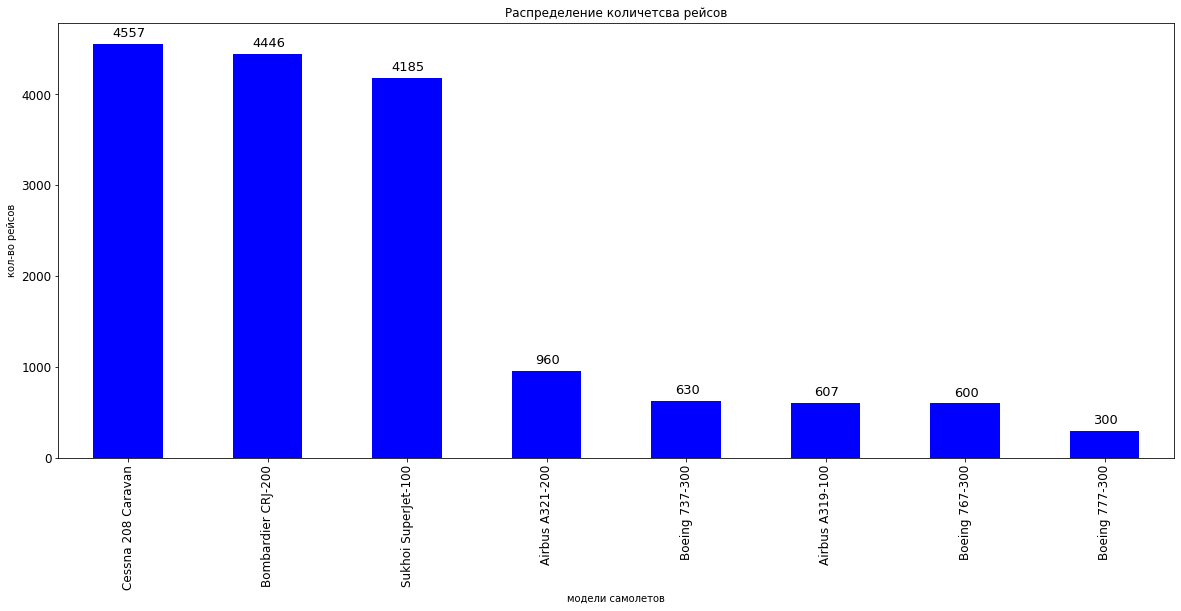

In [11]:
#график распределения авиаперелетов за месяц по разным моделям самолетов
model = (df1.pivot_table(index='model', values= 'flights_amount', aggfunc ='max')
        .sort_values(['flights_amount'],ascending = False)
     .plot(kind='bar' , figsize = (20,8) , title = 'Распределение количетсва рейсов', fontsize = 12 , color = 'blue' , legend= False))
plot(model, xlabel='модели самолетов',ylabel='кол-во рейсов')

## Дополнительные данные

In [12]:
#вычисление авиаперетов в день 
df1['day_flights'] = (df1['flights_amount'] /30).round(0)

In [13]:
#примерный расчет количества самолетов
df1['count_plane'] =(df1['day_flights'] / 4 ).round(0)

In [14]:
df1

,model,flights_amount,day_flights,count_plane
0,Airbus A319-100,607,20.0,5.0
1,Airbus A321-200,960,32.0,8.0
2,Boeing 737-300,630,21.0,5.0
3,Boeing 767-300,600,20.0,5.0
4,Boeing 777-300,300,10.0,2.0
5,Bombardier CRJ-200,4446,148.0,37.0
6,Cessna 208 Caravan,4557,152.0,38.0
7,Sukhoi SuperJet-100,4185,140.0,35.0


In [15]:
#сумарное количество самолетов
df1['count_plane'].sum()

135.0

In [16]:
#парсинг для получения таблицы по населению в 2018 году
url = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'
req = requests.get(url)
#print(req.status_code)
#200
soup = bs(req.text,'html.parser')
table = soup.find('table')
#зададим переменную для названия колонок
head = []
for row in table.find_all('th'):
    head.append(row.text)
#зададим переменную для данных из таблицы
content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
#изменим колонки в связи с некорректной выгрузкой
head = ['№', 'Город', 'Население, тыс. человек\n', '1897', '1926', '1939', '1959', '1970', '1979', '1989', '2002', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021\n']
population = pd.DataFrame(content,columns=head)
#изменим название колонки из-за съезда данных
population = population.rename(columns={'Население, тыс. человек\n' : 'city'})
population = population [['city', '2018']]
#приведем названия городов к нормальному значению
population['city']=(population['city'].replace({'Москва[17]':'Москва',
                                               'Балашиха[25]':'Балашиха',
                                               'Симферополь[Крым 1][24]':'Симферополь',
                                               'Подольск[27]':'Подольск',
                                               'Королёв[28]':'Королёв',
                                               'Керчь[Крым 1][24]':'Керчь',
                                                'Евпатория[Крым 1][24]': 'Евпатория',
                                               'Севастополь[Крым 1][24]':'Севастополь'}))
population.head()

,city,2018
0,Москва,12506
1,Санкт-Петербург,5352
2,Новосибирск,1613
3,Екатеринбург,1469
4,Казань,1244


In [17]:
#изменим данные
population = population.astype({'2018':'int'})
population.rename(columns={'2018':'population_2018'},inplace=True)

In [18]:
#объединение таблиц
df2 = df2.merge(population,on='city' ,how= 'left')

In [19]:
df2.sort_values('average_flights',ascending=False).head(10)

,city,average_flights,population_2018
43,Москва,129.774194,12506.0
70,Санкт-Петербург,31.161290,5352.0
54,Новосибирск,17.322581,1613.0
33,Красноярск,11.580645,1091.0
20,Екатеринбург,11.322581,1469.0
67,Ростов-на-Дону,10.193548,1130.0
63,Пермь,10.129032,1052.0
10,Брянск,10.000000,406.0
74,Сочи,9.612903,424.0
84,Ульяновск,9.580645,627.0


In [20]:
#вывод городов с высоким населением и низким количество авиаперевозок 
df2[(df2['average_flights']< 4)& (df2['population_2018']>400)]

,city,average_flights,population_2018
4,Астрахань,2.451613,534.0
5,Барнаул,2.612903,632.0
12,Владивосток,3.000000,605.0
16,Воронеж,2.000000,1048.0
21,Иваново,1.000000,406.0
22,Ижевск,1.000000,648.0
28,Кемерово,2.000000,559.0
32,Краснодар,3.903226,900.0
35,Курск,2.290323,449.0
37,Липецк,1.294118,510.0


# Вывод

Исходя из полученных данных и построенных графиков можно сделать выводы:
* Исходя из количества авиарейсов произведенных в сентябре 2018 года, выделяются 3 модели самолетов, выполнившие наибольшее количество рейсов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, которые объединяет средняя вместимость и их оптимально использовать для перевозки на внутренних рейсах, также в авиапарке есть самолеты с большой вместимостью, что выгодно использовать для наиболее популярных рейсов.
* Также исходя из вида использованных моделей, можно заметить, что активно обновляется авиапарк сравнительно новыми SuperJet-100.
* Если взять примерные данные, исходя из статистики ряда АК, можно предположить, что в среднем каждый самолет выполняет 4 рейса, можно получить цифру авиапарка рассматриваемой АК в 135 самолетов. 81,5% авиарейсов выполняют на самолетах средней вместимости Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Данный показатель говорит о грамотном распределении авиапарка для выполнения внутренних рейсов.
* По данным распределения среднего количества рейсов в день в сентябре 2018 года, в различные города распределение местами выглядит логично , в наиболее крупные города страны выполняет наибольшее количество рейсов, даже исходя из население городов изначально выглядит нелогичным различие авиарейсов в Москву и Санкт-Петербург, разница в населении в 2,3 раза, а разница  в авиаперевозках в 4 раза. Но в Москву наиболее часто летят не жители города -  выполняется много деловых поездок.<br>Рекомендуется поподробнее проанализировать авиаперелеты в Брянск и Ульяновск, в данные города с относительно небольшим населением, выполняется большое количество авиарейсов в день(в районе 10 рейсов в день), в то же время , есть ряд городов на которые стоит обратить внимания, такие как Краснодар, Омск, Самара, имеющее высокую численность населения.